# HW 1 
### Atahan Tap
### 0069374 

# Imports


In [602]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import scipy.linalg as linalg

# Given Parameters

In [603]:
class_means = np.array([np.array([0.0 , 4.5]), 
                        np.array([-4.5 , -1.0]), 
                        np.array([4.5 , -1.0]), 
                        np.array([0.0 , -4.0])])

class_covariance_matrices = np.array([np.array([np.array([3.2 , 0.0]),np.array([0.0 , 1.2])]), 
                                    np.array([np.array([1.2 , 0.8]),np.array([0.8 , 1.2])]), 
                                    np.array([np.array([1.2 , -0.8]),np.array([-0.8 , 1.2])]), 
                                    np.array([np.array([1.2 , 0.0]),np.array([0.0 , 3.2])])])

class_sizes = np.array([105, 145, 135, 115])

# Generate Points

In [604]:
np.random.seed(999)

points1 = np.random.multivariate_normal(class_means[0], class_covariance_matrices[0], class_sizes[0])
points1_x1 = np.array([points1[c][0] for c in range(class_sizes[0])])
points1_x2 = np.array([points1[c][1] for c in range(class_sizes[0])])


points2 = np.random.multivariate_normal(class_means[1], class_covariance_matrices[1], class_sizes[1])
points2_x1 = np.array([points2[c][0] for c in range(class_sizes[1])])
points2_x2 = np.array([points2[c][1] for c in range(class_sizes[1])])

points3 = np.random.multivariate_normal(class_means[2], class_covariance_matrices[2], class_sizes[2])
points3_x1 = np.array([points3[c][0] for c in range(class_sizes[2])])
points3_x2 = np.array([points3[c][1] for c in range(class_sizes[2])])

points4 = np.random.multivariate_normal(class_means[3], class_covariance_matrices[3], class_sizes[3])
points4_x1 = np.array([points4[c][0] for c in range(class_sizes[3])])
points4_x2 = np.array([points4[c][1] for c in range(class_sizes[3])])

points = np.concatenate((points1, points2, points3, points4))

y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), 
                    np.repeat(3, class_sizes[2]), np.repeat(4, class_sizes[3])))

K = 4

# Plot the Points

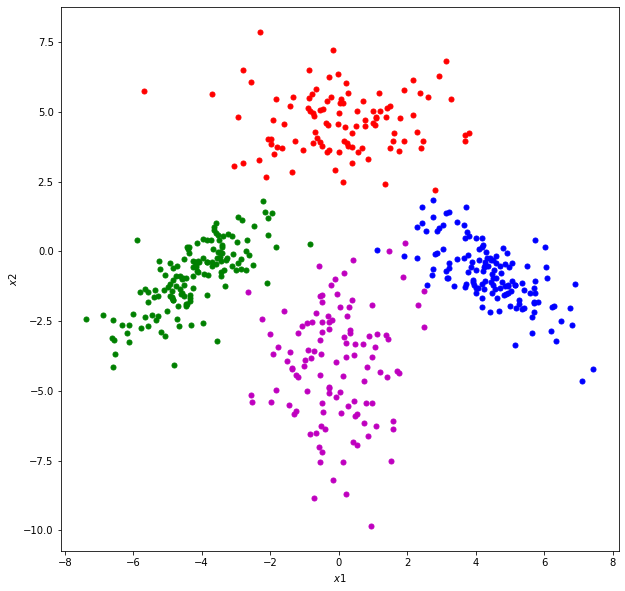

In [605]:
plt.figure(figsize = (10, 10))

plt.plot(points1_x1, points1_x2, "r.", markersize = 10)

plt.plot(points2_x1, points2_x2, "g.", markersize = 10)

plt.plot(points3_x1, points3_x2, "b.", markersize = 10)

plt.plot(points4_x1, points4_x2, "m.", markersize = 10)

#plt.xlim((-8, +8))
#plt.ylim((-8, +8))
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.show()

# Calculate Sample Parameters

## Sample Means

In [606]:
sample_means = np.array([[np.mean([p[i] for p in points[y == c + 1]]) for i in range(2)] 
                for c in range(K)])

print('Sample Means: \n', sample_means)


Sample Means: 
 [[ 0.06995586  4.62516046]
 [-4.24495671 -0.91800949]
 [ 4.43056498 -0.82732762]
 [-0.08818131 -4.0785398 ]]


## Sample Covariances

In [607]:
sample_covariances = np.array([np.divide(np.matmul(np.transpose(points[y == c + 1] - sample_means[c]), 
                                points[y == c + 1] - sample_means[c]),
                                sum(y == c + 1))
                      for c in range(K)])

print('Sample Covariances: \n', sample_covariances)


Sample Covariances: 
 [[[ 2.93589052 -0.03972959]
  [-0.03972959  1.14656385]]

 [[ 1.34342583  1.03198004]
  [ 1.03198004  1.45723836]]

 [[ 1.31802112 -0.87556305]
  [-0.87556305  1.24720708]]

 [[ 1.20931317  0.11893793]
  [ 0.11893793  4.06040859]]]


## Class Priors

In [608]:
class_priors = np.array([np.mean(y == c + 1) for c in range(K)])

print('Class Priors: \n', class_priors)

Class Priors: 
 [0.21 0.29 0.27 0.23]


# Multivariate Classification

## Calculating W matrices

In [609]:
D = 2

W = np.array([np.multiply(-1/2, linalg.cho_solve(linalg.cho_factor(sample_covariances[c]), np.eye(2))) 
              for c in range(K)])

print('W: \n', W)

w = np.array([np.matmul(linalg.cho_solve(linalg.cho_factor(sample_covariances[c]), np.eye(2)), sample_means[c]) 
              for c in range(K)])

print('w: \n', w)

w0 = np.array([-1/2*np.matmul(np.matmul(np.transpose(sample_means[c]), 
                                        linalg.cho_solve(linalg.cho_factor(sample_covariances[c]), np.eye(2))), 
                              sample_means[c]) 
                   - D/2 * np.log(2 * math.pi)
                   - 1/2 * np.log(np.linalg.det(sample_covariances[c]))
                   + np.log(class_priors[c])
               for c in range(K)])

print('w0: \n', w0)


W: 
 [[[-0.17038597 -0.00590404]
  [-0.00590404 -0.43629019]]

 [[-0.81618905  0.57800483]
  [ 0.57800483 -0.75244345]]

 [[-0.7108743  -0.49904725]
  [-0.49904725 -0.75123638]]

 [[-0.41465241  0.01214604]
  [ 0.01214604 -0.1234961 ]]]
w: 
 [[ 0.0784533   4.03665035]
 [-5.86814656  3.52571056]
 [ 5.47339836  3.17908534]
 [ 0.02594706 -1.00522541]]
w0: 
 [-13.3430024  -13.85570022 -13.89177096  -6.15056048]


## Calculating scores

### Score classifier function

In [610]:
def score_classifier(point):
    scores = [(score(point, c), c + 1)
             for c in range(K)]
    return max(scores, key = lambda i : i[0])[1]

def score(point, c):
    return (np.matmul(np.matmul(np.transpose(point), W[c]), point)
                 + np.matmul(np.transpose(w[c]), point)
                 + w0[c])


### Creating *y* predictions and the confusion matrix

In [611]:
y_pred = [score_classifier(point) for point in points]


In [612]:
confusion_matrix = pd.crosstab(y_pred,
                               y,
                               rownames = ['y_pred'],
                               colnames = ['y_truth'])
print('Confusion matrix:\n')
print(confusion_matrix)

Confusion matrix:

y_truth    1    2    3    4
y_pred                     
1        104    0    0    0
2          0  143    0    1
3          1    0  134    2
4          0    2    1  112


# Plot the classes

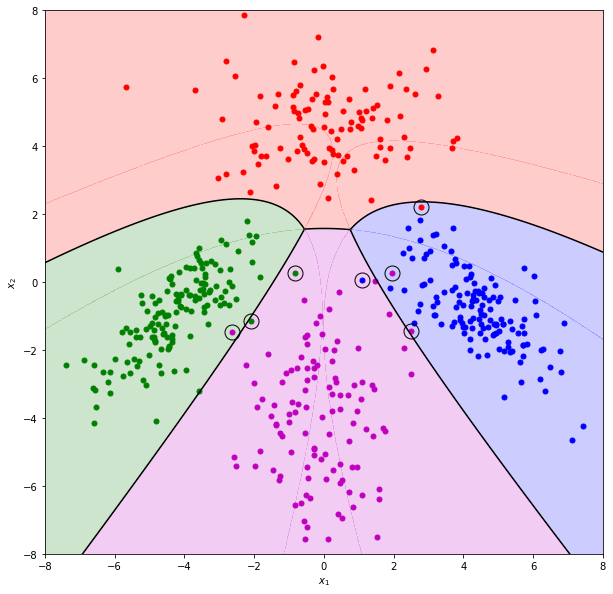

In [613]:
import warnings
warnings.simplefilter('ignore', UserWarning)

x1_interval = np.linspace(-10, +10, 2001)
x2_interval = np.linspace(-10, +10, 2001)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)

score_functions = np.zeros((2001, 2001, 4))

for c in range(K):
    score_functions[:,:,c] = W[c][0][0] * x1_grid**2 + W[c][0][1] * x1_grid * x2_grid + \
                                     W[c][1][0] * x1_grid * x2_grid + \
                                     W[c][1][1] * x2_grid**2 + \
                                     w[c][0] * x1_grid + \
                                     w[c][1] * x2_grid + \
                                     w0[c]

for c in range(K):
    for i in range(K):
        for j in range(i+1,K):
            if c != i and c != j:  
                score_functions[:,:,c][(score_functions[:,:,c] < score_functions[:,:,i]) & 
                                       (score_functions[:,:,c] < score_functions[:,:,j])] = np.nan

plt.figure(figsize = (10, 10))
plt.plot(points[y == 1, 0], points[y == 1, 1], "r.", markersize = 10)
plt.plot(points[y == 2, 0], points[y == 2, 1], "g.", markersize = 10)
plt.plot(points[y == 3, 0], points[y == 3, 1], "b.", markersize = 10)
plt.plot(points[y == 4, 0], points[y == 4, 1], "m.", markersize = 10)

plt.plot(points[y_pred != y, 0], points[y_pred != y, 1],
         "ko", markersize = 15, fillstyle = "none")

for i in range(K):
    for j in range(i+1,K):
        plt.contour(x1_grid, x2_grid, score_functions[:,:,i] - score_functions[:,:,j], 
                    levels = 0, colors = "k")

point_colors = ['r', 'g', 'b', 'm']

for i in range(K):
    for j in range(i+1,K):
        plt.contourf(x1_grid, x2_grid, score_functions[:,:,i] - score_functions[:,:,j], 
                     levels = 0, colors = [point_colors[j], point_colors[i]], alpha = 0.2)


plt.xlim((-8, +8))
plt.ylim((-8, +8))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()